In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Charger les données
df = pd.read_csv('F:\Projet_final_nlp\data_final\WELFake_workbase.csv')

# Afficher les premières lignes
df.head()

,label,message
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,0,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,1,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,0,SATAN 2: Russia unvelis an image of its terrif...
4,0,About Time! Christian Group Sues Amazon and SP...


In [3]:
# Afficher toutes les colonnes
df.columns


Index(['label', 'message'], dtype='object')

In [4]:
# Afficher les 50 premières lignes
df.head(50)


,label,message
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,0,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,1,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,0,SATAN 2: Russia unvelis an image of its terrif...
4,0,About Time! Christian Group Sues Amazon and SP...
5,0,DR BEN CARSON TARGETED BY THE IRS: “I never ha...
6,0,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...
7,0,Sports Bar Owner Bans NFL Games…Will Show Only...
8,0,Latest Pipeline Leak Underscores Dangers Of Da...
9,0,GOP Senator Just Smacked Down The Most Puncha...


In [5]:
# Afficher les dimensions du dataset
df.shape



(63121, 2)

In [6]:
# Vérifier les doublons dans le dataset
df.duplicated().sum()


np.int64(0)

In [7]:
# Afficher les doublons
df[df.duplicated()]


,label,message


In [8]:
import string

# Compter la ponctuation dans les messages
punctuation_count = {p: 0 for p in string.punctuation}

# Parcourir chaque message et compter la ponctuation
for message in df['message']:
    for char in message:
        if char in string.punctuation:
            punctuation_count[char] += 1

punctuation_count


{'!': 30754,
 '"': 56385,
 '#': 10601,
 '$': 34562,
 '%': 8534,
 '&': 9454,
 "'": 62769,
 '(': 117355,
 ')': 118345,
 '*': 9757,
 '+': 2398,
 ',': 1879601,
 '-': 356805,
 '.': 1888076,
 '/': 47066,
 ':': 137476,
 ';': 17889,
 '<': 1736,
 '=': 5244,
 '>': 1784,
 '?': 60822,
 '@': 34806,
 '[': 21507,
 '\\': 192,
 ']': 17613,
 '^': 555,
 '_': 17254,
 '`': 140,
 '{': 773,
 '|': 2017,
 '}': 775,
 '~': 339}

In [9]:
# Calcul du nombre de caractères
df['char_count'] = df['message'].apply(len)

# Calcul du nombre de mots
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Affichage des premières lignes pour vérifier
df[['message', 'char_count', 'word_count']].head()


,message,char_count,word_count
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,5182,890
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,356,53
2,"Bobby Jindal, raised Hindu, uses story of Chri...",8118,1338
3,SATAN 2: Russia unvelis an image of its terrif...,2014,346
4,About Time! Christian Group Sues Amazon and SP...,1611,258


In [10]:
# Vérification du nombre de messages dans chaque label
label_counts = df['label'].value_counts()
print(label_counts)


label
1    34791
0    28330
Name: count, dtype: int64


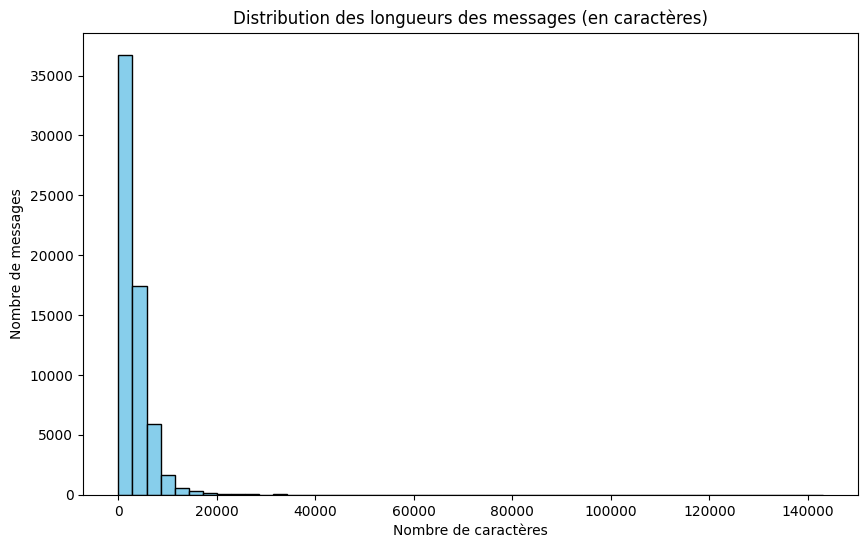

In [11]:
import matplotlib.pyplot as plt

# Distribution des longueurs des messages
plt.figure(figsize=(10, 6))
plt.hist(df['char_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution des longueurs des messages (en caractères)')
plt.xlabel('Nombre de caractères')
plt.ylabel('Nombre de messages')
plt.show()


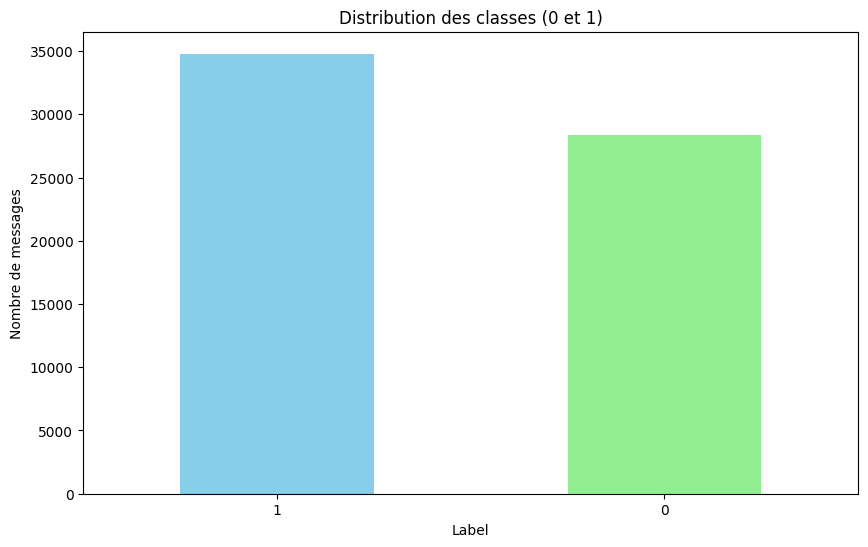

In [12]:
# Distribution des labels
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution des classes (0 et 1)')
plt.xlabel('Label')
plt.ylabel('Nombre de messages')
plt.xticks(rotation=0)
plt.show()


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisation de CountVectorizer
vectorizer = CountVectorizer(stop_words=None)  # On ne retire pas les mots vides pour cette analyse

# Transformation des messages en termes de mots
X = vectorizer.fit_transform(df['message'])

# Calcul des fréquences de mots
word_freq = X.sum(axis=0).A1

# Création d'un DataFrame avec les mots et leurs fréquences
word_freq_df = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(), word_freq)), columns=['Word', 'Frequency'])

# Tri des mots par fréquence
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Affichage des 20 mots les plus fréquents
word_freq_df.head(20)


,Word,Frequency
192942,the,1992732
195233,to,998474
140560,of,883057
17550,and,811216
96428,in,692640
192886,that,472206
141594,on,336502
100205,is,334252
75605,for,332851
100638,it,266416


In [14]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import re

# Fonction pour nettoyer et compter les mots vides dans un texte
def count_stopwords(text):
    # Nettoyage du texte
    text = re.sub(r'\W', ' ', text.lower())
    # Tokenisation du texte en mots
    words = text.split()
    # Comptage des mots vides
    stopwords = [word for word in words if word in ENGLISH_STOP_WORDS]
    return len(stopwords)

# Appliquer la fonction sur chaque message du dataset
df['stopword_count'] = df['message'].apply(count_stopwords)

# Vérification des 50 premières lignes avec le nombre de mots vides
df[['message', 'stopword_count']].head(50)


,message,stopword_count
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,456
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,19
2,"Bobby Jindal, raised Hindu, uses story of Chri...",639
3,SATAN 2: Russia unvelis an image of its terrif...,137
4,About Time! Christian Group Sues Amazon and SP...,111
5,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,17
6,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,4
7,Sports Bar Owner Bans NFL Games…Will Show Only...,140
8,Latest Pipeline Leak Underscores Dangers Of Da...,219
9,GOP Senator Just Smacked Down The Most Puncha...,297


In [15]:
from nltk.corpus import stopwords

# Télécharger les stop words de NLTK si nécessaire
import nltk
nltk.download('stopwords')

# Récupérer la liste des stop words
stop_words = set(stopwords.words('english'))

# Sauvegarder dans un fichier
with open("stop_words.txt", "w") as file:
    for word in stop_words:
        file.write(f"{word}\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mboum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Charger la stop list
with open("stop_words.txt", "r") as file:
    stop_words = set(file.read().splitlines())

# Fonction pour supprimer les stop words
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

# Appliquer aux messages
df['clean_message'] = df['message'].apply(remove_stopwords)


In [17]:
print(df[['message', 'clean_message']].head(10))


                                             message  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
2  Bobby Jindal, raised Hindu, uses story of Chri...   
3  SATAN 2: Russia unvelis an image of its terrif...   
4  About Time! Christian Group Sues Amazon and SP...   
5  DR BEN CARSON TARGETED BY THE IRS: “I never ha...   
6  HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...   
7  Sports Bar Owner Bans NFL Games…Will Show Only...   
8  Latest Pipeline Leak Underscores Dangers Of Da...   
9   GOP Senator Just Smacked Down The Most Puncha...   

                                       clean_message  
0  LAW ENFORCEMENT HIGH ALERT Following Threats C...  
1  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS CH...  
2  Bobby Jindal, raised Hindu, uses story Christi...  
3  SATAN 2: Russia unvelis image terrifying new ‘...  
4  Time! Christian Group Sues Amazon SPLC Designa...  
5  DR BEN CARSON TARGETED IRS: “I never audit spo... 

In [18]:
print(df.loc[2, ['message', 'clean_message']])


message          Bobby Jindal, raised Hindu, uses story of Chri...
clean_message    Bobby Jindal, raised Hindu, uses story Christi...
Name: 2, dtype: object


In [19]:
df['clean_char_count'] = df['clean_message'].str.len()
df['clean_word_count'] = df['clean_message'].str.split().apply(len)

print(df[['char_count', 'clean_char_count', 'word_count', 'clean_word_count']].head(10))


   char_count  clean_char_count  word_count  clean_word_count
0        5182              3586         890               495
1         356               290          53                37
2        8118              5955        1338               777
3        2014              1560         346               220
4        1611              1205         258               154
5         189               127          36                21
6          83                75          13                11
7        1558              1084         285               158
8        3076              2359         495               311
9        4762              3756         704               454


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Création de l'instance de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limité à 5000 termes pour une performance optimale


In [21]:
# Application du vectoriseur sur la colonne 'clean_message'
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_message'])

# Conversion en DataFrame pour visualisation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Affichage des 5 premières lignes
print(tfidf_df.head())


         00       000        10  100   11   12   13   14   15  150  ...  zika  \
0  0.049401  0.000000  0.025518  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2  0.000000  0.020341  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3  0.000000  0.118462  0.084396  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

   zimbabwe  zone  zones  zuma   на   не   по  что  это  
0       0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  
1       0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  
4       0.0   0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]


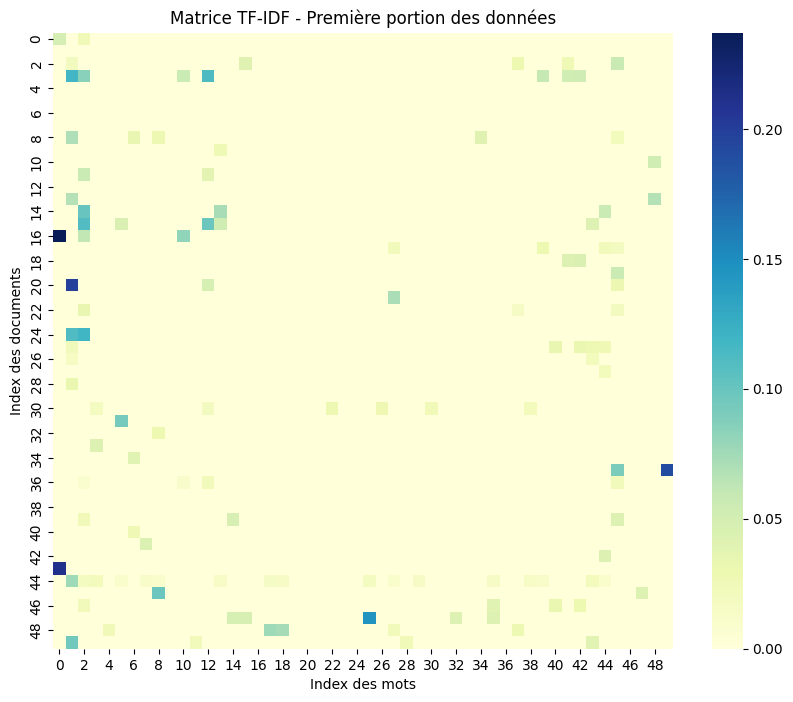

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la matrice sparse en une matrice dense pour la visualisation
dense_matrix = tfidf_matrix.toarray()

# Créer une matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(dense_matrix[:50, :50], cmap='YlGnBu', cbar=True, annot=False)
plt.title("Matrice TF-IDF - Première portion des données")
plt.xlabel("Index des mots")
plt.ylabel("Index des documents")
plt.show()


In [23]:
import re

# Exemple : vérifier la ponctuation dans les colonnes de messages nettoyés
sample_messages = df["clean_message"].head(10)
for message in sample_messages:
    if re.search(r'[^\w\s]', message):
        print(f"Ponctuation trouvée dans : {message}")
    else:
        print("Aucune ponctuation détectée.")


Ponctuation trouvée dans : LAW ENFORCEMENT HIGH ALERT Following Threats Cops Whites 9-11By #BlackLivesMatter #FYF911 Terrorists [VIDEO] - comment expected Barack Obama Members #FYF911 #FukYoFlag #BlackLivesMatter movements called lynching hanging white people cops. encouraged others radio show Tuesday night turn tide kill white people cops send message killing black people America.One F***YoFlag organizers called Sunshine. radio blog show hosted Texas called, Sunshine F***ing Opinion Radio Show. snapshot #FYF911 @LOLatWhiteFear Twitter page 9:53 p.m. shows urging supporters Call now!! #fyf911 tonight continue dismantle illusion white SNAPSHOT Twitter Radio Call Invite #FYF911The radio show aired 10:00 p.m. eastern standard time.During show, callers clearly call lynching killing white people.A 2:39 minute clip radio show heard here. provided Breitbart Texas someone would like referred Hannibal. already received death threats result interrupting #FYF911 conference calls.An unidentified b

In [24]:
import string

df['clean_message'] = df['clean_message'].apply(
    lambda x: ''.join([char for char in x if char not in string.punctuation])
)


In [26]:
import re

# Exemple : vérifier la ponctuation dans les colonnes de messages nettoyés
sample_messages = df["clean_message"].head(10)
for message in sample_messages:
    if re.search(r'[^\w\s]', message):
        print(f"Ponctuation trouvée dans : {message}")
    else:
        print("Aucune ponctuation détectée.")


Aucune ponctuation détectée.
Ponctuation trouvée dans : UNBELIEVABLE OBAMA’S ATTORNEY GENERAL SAYS CHARLOTTE RIOTERS “PEACEFUL” PROTESTERS…In Home State North Carolina VIDEO  Now demonstrators gathered last night exercising constitutional protected right peaceful protest order raise issues create change Loretta Lynch aka Eric Holder skirt
Ponctuation trouvée dans : Bobby Jindal raised Hindu uses story Christian conversion woo evangelicals potential 2016 bid  dozen politically active pastors came private dinner Friday night hear conversion story unique context presidential politics Louisiana Gov Bobby Jindal traveled Hinduism Protestant Christianity and ultimately became calls “evangelical Catholic” two hours Jindal 42 recalled talking girl high school wanted “save soul” reading Bible closet parents would see feeling stir watching movie senior year depicted Jesus cross “I struck struck hard” Jindal told pastors “This Son God died sins” Jindal’s session Christian clergy lead congregation

In [25]:
import string

# Suppression de la ponctuation
df['clean_message'] = df['clean_message'].apply(
    lambda x: ''.join([char for char in x if char not in string.punctuation])
)

# Vérification : affichage de quelques exemples
print(df['clean_message'].head(10))


0    LAW ENFORCEMENT HIGH ALERT Following Threats C...
1    UNBELIEVABLE OBAMA’S ATTORNEY GENERAL SAYS CHA...
2    Bobby Jindal raised Hindu uses story Christian...
3    SATAN 2 Russia unvelis image terrifying new ‘S...
4    Time Christian Group Sues Amazon SPLC Designat...
5    DR BEN CARSON TARGETED IRS “I never audit spok...
6    HOUSE INTEL CHAIR TrumpRussia Fake Story “No e...
7    Sports Bar Owner Bans NFL Games…Will Show ‘Tru...
8    Latest Pipeline Leak Underscores Dangers Dakot...
9    GOP Senator Smacked Punchable AltRight Nazi In...
Name: clean_message, dtype: object


In [27]:
import re

# Suppression de toute la ponctuation avec une expression régulière
df['clean_message'] = df['clean_message'].apply(
    lambda x: re.sub(r'[^\w\s]', '', x)
)

# Vérification : affichage des 10 premières lignes
print(df['clean_message'].head(10))


0    LAW ENFORCEMENT HIGH ALERT Following Threats C...
1    UNBELIEVABLE OBAMAS ATTORNEY GENERAL SAYS CHAR...
2    Bobby Jindal raised Hindu uses story Christian...
3    SATAN 2 Russia unvelis image terrifying new SU...
4    Time Christian Group Sues Amazon SPLC Designat...
5    DR BEN CARSON TARGETED IRS I never audit spoke...
6    HOUSE INTEL CHAIR TrumpRussia Fake Story No ev...
7    Sports Bar Owner Bans NFL GamesWill Show True ...
8    Latest Pipeline Leak Underscores Dangers Dakot...
9    GOP Senator Smacked Punchable AltRight Nazi In...
Name: clean_message, dtype: object


In [28]:
import re

# Exemple : vérifier la ponctuation dans les colonnes de messages nettoyés
sample_messages = df["clean_message"].head(10)
for message in sample_messages:
    if re.search(r'[^\w\s]', message):
        print(f"Ponctuation trouvée dans : {message}")
    else:
        print("Aucune ponctuation détectée.")


Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.
Aucune ponctuation détectée.


In [29]:
# Recalcul du vectoriseur TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_message'])

# Conversion en DataFrame pour visualisation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Affichage des 5 premières lignes
print(tfidf_df.head())


   000   10  100      1000     10000  100000   11   12   13   14  ...  zero  \
0  0.0  0.0  0.0  0.047447  0.000000     0.0  0.0  0.0  0.0  0.0  ...   0.0   
1  0.0  0.0  0.0  0.000000  0.000000     0.0  0.0  0.0  0.0  0.0  ...   0.0   
2  0.0  0.0  0.0  0.000000  0.000000     0.0  0.0  0.0  0.0  0.0  ...   0.0   
3  0.0  0.0  0.0  0.000000  0.080132     0.0  0.0  0.0  0.0  0.0  ...   0.0   
4  0.0  0.0  0.0  0.000000  0.000000     0.0  0.0  0.0  0.0  0.0  ...   0.0   

   zika  zimbabwe  zone  zones   на   не   по  что  это  
0   0.0       0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  
1   0.0       0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  
2   0.0       0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  
3   0.0       0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  
4   0.0       0.0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]


In [30]:
# Affichage des 50 premiers mots du vocabulaire
print(tfidf_vectorizer.get_feature_names_out()[:50])


['000' '10' '100' '1000' '10000' '100000' '11' '12' '13' '14' '15' '150'
 '16' '17' '18' '19' '1960s' '1970s' '1980' '1980s' '1990s' '1991' '1992'
 '1993' '1994' '1995' '1996' '1998' '1999' '20' '200' '2000' '2001' '2002'
 '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2017realdonaldtrump']


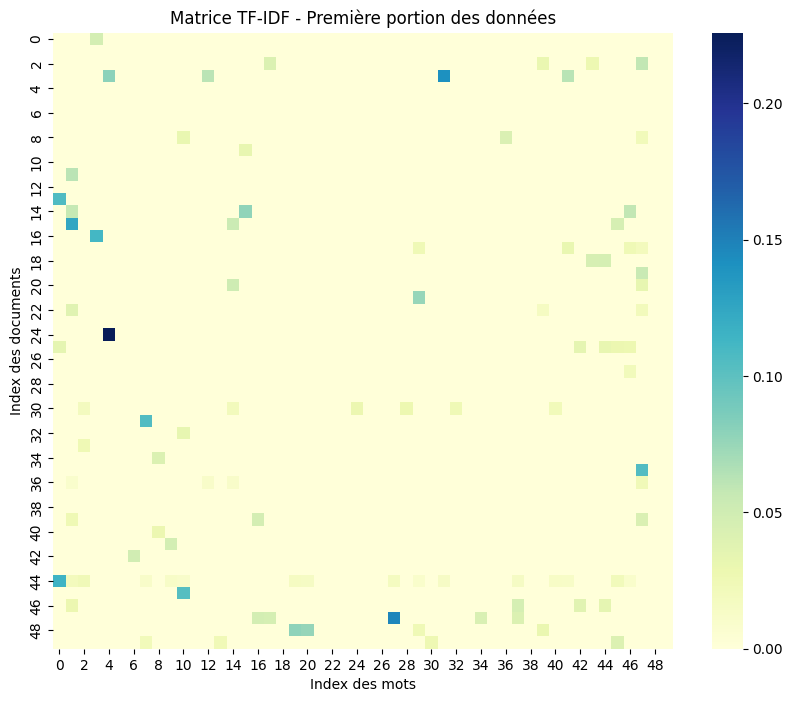

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la matrice sparse en une matrice dense pour la visualisation
dense_matrix = tfidf_matrix.toarray()

# Créer une matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(dense_matrix[:50, :50], cmap='YlGnBu', cbar=True, annot=False)
plt.title("Matrice TF-IDF - Première portion des données")
plt.xlabel("Index des mots")
plt.ylabel("Index des documents")
plt.show()


           word  mean_tfidf_weight
4636      trump           0.057648
3917       said           0.046371
4720         us           0.027465
3426  president           0.023251
4958      would           0.023075
896     clinton           0.022915
2952         mr           0.021785
3275     people           0.021052
3019        new           0.019217
3120        one           0.018434


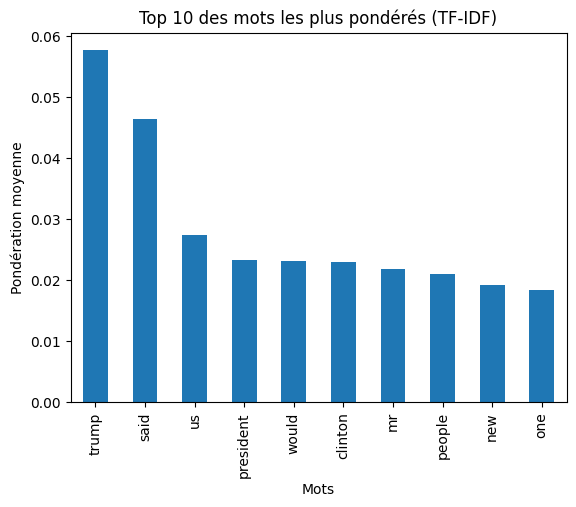

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtenir les mots du vocabulaire
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Moyenne des poids TF-IDF par terme
mean_tfidf_weights = np.mean(tfidf_matrix.toarray(), axis=0)

# Créer un DataFrame avec les mots et leurs poids moyens
df_tfidf_weights = pd.DataFrame({'word': feature_names, 'mean_tfidf_weight': mean_tfidf_weights})

# Trier les termes en fonction de leur poids moyen
df_tfidf_weights = df_tfidf_weights.sort_values(by='mean_tfidf_weight', ascending=False)

# Afficher les 10 premiers termes les plus pondérés
print(df_tfidf_weights.head(10))

# Visualisation des 10 premiers termes les plus pondérés
df_tfidf_weights.head(10).plot(kind='bar', x='word', y='mean_tfidf_weight', legend=False)
plt.title('Top 10 des mots les plus pondérés (TF-IDF)')
plt.xlabel('Mots')
plt.ylabel('Pondération moyenne')
plt.xticks(rotation=90)
plt.show()


[('said', 218425), ('Trump', 177014), ('would', 94815), ('people', 73737), ('US', 71640), ('Mr', 70513), ('one', 64735), ('also', 56410), ('Clinton', 55226), ('like', 46873)]


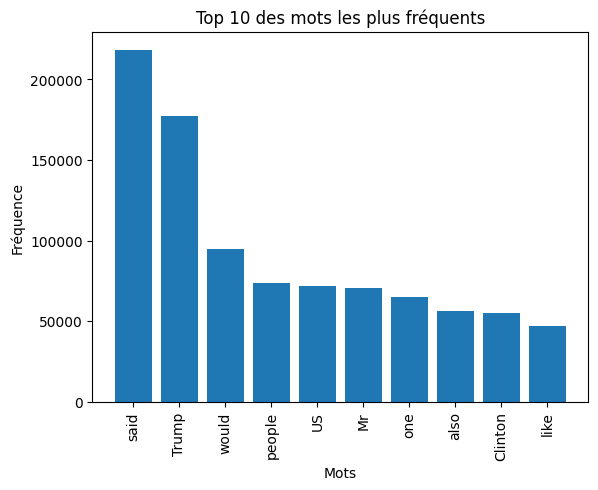

In [33]:
from collections import Counter

# Convertir les termes en une seule liste
all_words = ' '.join(df['clean_message']).split()

# Compter la fréquence des mots
word_counts = Counter(all_words)

# Afficher les 10 mots les plus fréquents
common_words = word_counts.most_common(10)
print(common_words)

# Visualisation des 10 mots les plus fréquents
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Top 10 des mots les plus fréquents')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)
plt.show()


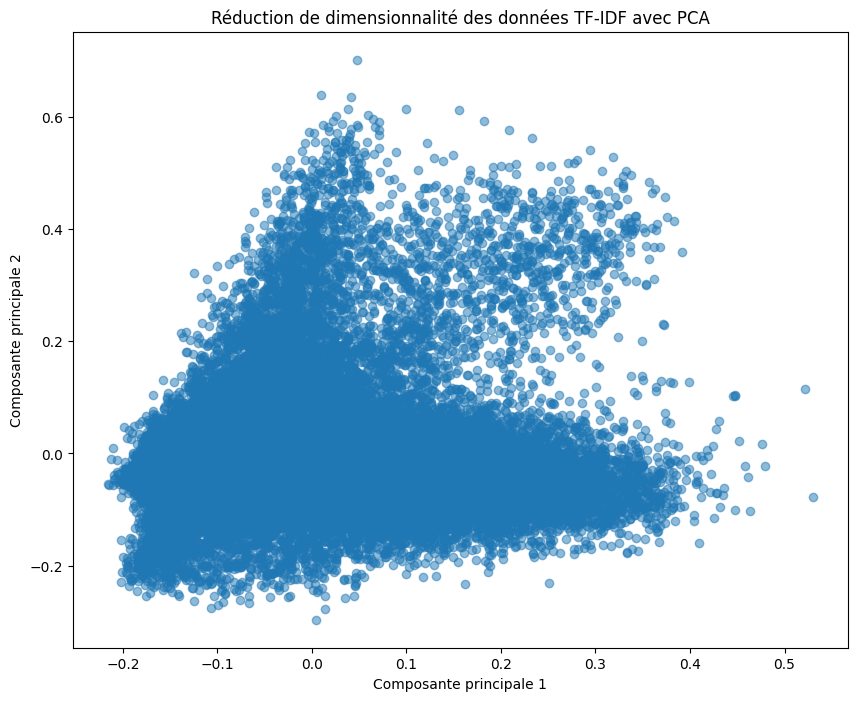

In [34]:
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire la dimensionnalité à 2 dimensions
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())

# Visualisation des 2 premières composantes principales
plt.figure(figsize=(10, 8))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], alpha=0.5)
plt.title('Réduction de dimensionnalité des données TF-IDF avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
X = tfidf_matrix  # Caractéristiques (TF-IDF)
y = df['label']   # Assurez-vous que votre dataframe df a une colonne 'label' pour les catégories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
# Création du modèle
model = LogisticRegression(max_iter=1000)

# Entraînement du modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [37]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)


In [38]:
from sklearn.metrics import classification_report

# Rapport de classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5670
           1       0.96      0.96      0.96      6955

    accuracy                           0.95     12625
   macro avg       0.95      0.95      0.95     12625
weighted avg       0.95      0.95      0.95     12625



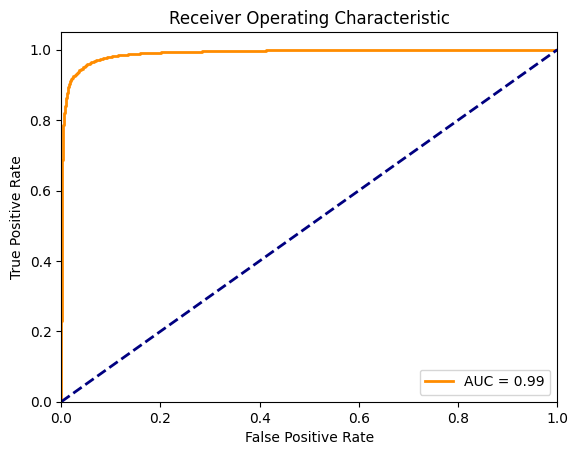

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des probabilités
y_prob = model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [40]:
import joblib

# Sauvegarder le modèle
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Évaluation avec validation croisée (5-fold cross-validation)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Afficher les scores de chaque pli
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen : {np.mean(scores)}")


Scores de validation croisée : [0.95188119 0.95049015 0.9532627  0.94930191 0.95623329]
Score moyen : 0.9522338472880856


In [42]:
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'solver': ['lbfgs', 'liblinear'],     # Algorithmes d'optimisation
    'max_iter': [100, 500, 1000]          # Nombre d'itérations
}

# Initialiser GridSearchCV avec la régression logistique
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Appliquer GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure performance (accuracy) : {grid_search.best_score_}")


Meilleurs paramètres : {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Meilleure performance (accuracy) : 0.9581352962110747


In [43]:
# Création et entraînement du modèle avec les meilleurs paramètres
final_model = LogisticRegression(C=10, max_iter=100, solver='lbfgs')
final_model.fit(X_train, y_train)


LogisticRegression(C=10)

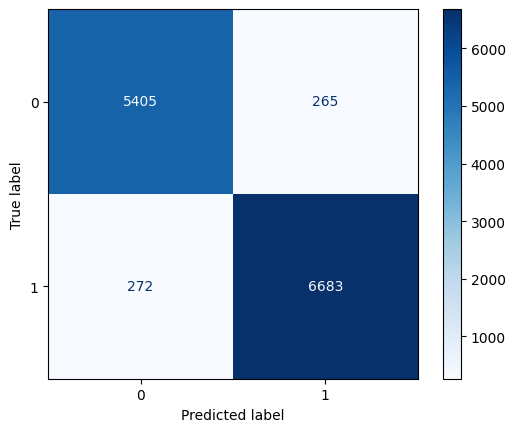

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur les données de test
y_pred = final_model.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='Blues')


In [45]:
print(y_train.value_counts())


label
1    27836
0    22660
Name: count, dtype: int64


In [46]:
from imblearn.over_sampling import SMOTE

# Initialisation de SMOTE
smote = SMOTE(random_state=42)

# Application de SMOTE sur les données d'entraînement
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Vérification des nouvelles proportions après SMOTE
from collections import Counter
print("Répartition après SMOTE :", Counter(y_train_smote))


Répartition après SMOTE : Counter({1: 27836, 0: 27836})


In [47]:
# Réentraîner le modèle sur les données équilibrées
model_smote = LogisticRegression(C=10, max_iter=100, solver='lbfgs', random_state=42)
model_smote.fit(X_train_smote, y_train_smote)


LogisticRegression(C=10, random_state=42)

In [48]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Affichage des premières prédictions pour vérifier
print(y_pred[:10])


[0 0 1 1 0 0 0 1 1 1]


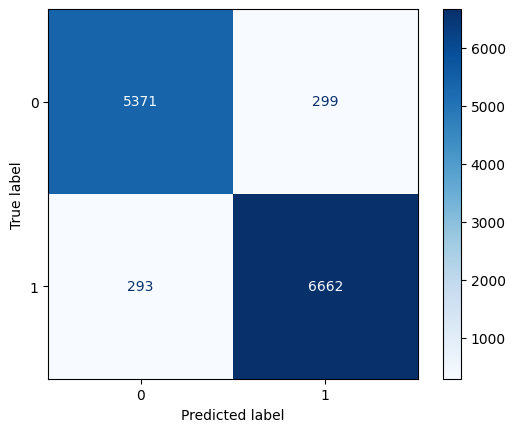

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')


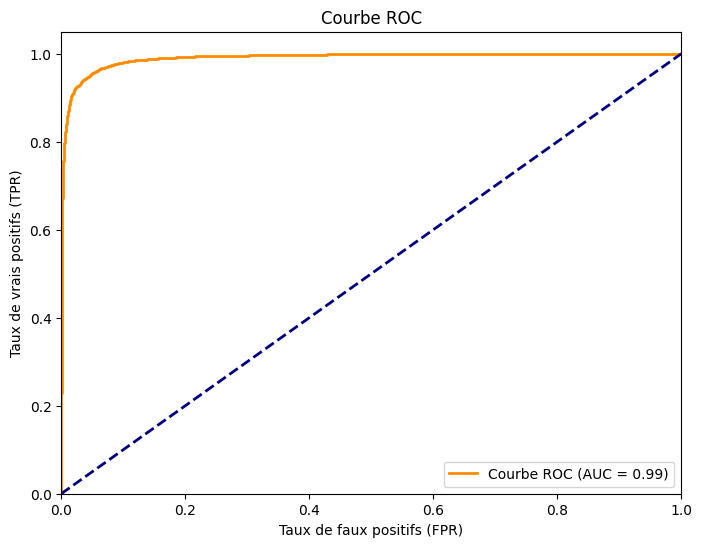

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédiction des probabilités
y_probs = model.predict_proba(X_test)[:, 1]  # On prend la probabilité de la classe 1

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonale de chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


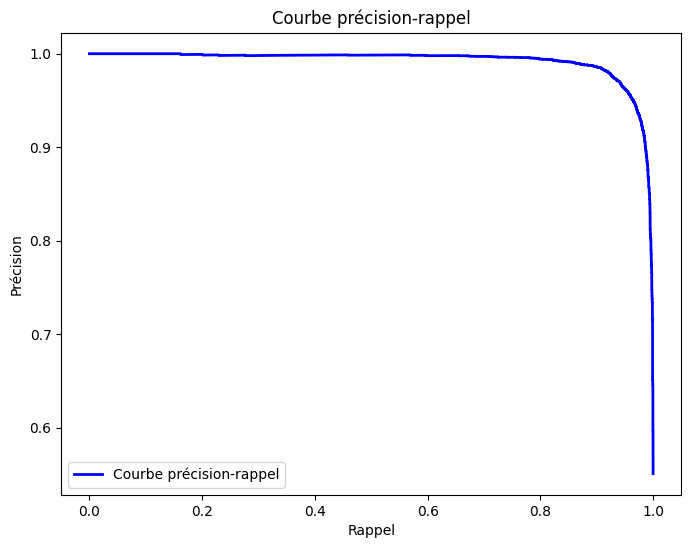

In [51]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcul des courbes de précision et rappel
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Tracer la courbe de précision-rappel
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Courbe précision-rappel')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe précision-rappel')
plt.legend(loc='lower left')
plt.show()


In [52]:
from sklearn.metrics import f1_score

# Calcul du F1-score pour les prédictions
f1 = f1_score(y_test, y_pred)

# Affichage du F1-score
print(f"F1-score : {f1}")


F1-score : 0.9574590399540098


In [53]:
import joblib
joblib.dump(model, 'logistic_regression_model_smote.pkl')


['logistic_regression_model_smote.pkl']